In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# Load the dataset (Replace this with your actual data file path)
data = pd.read_csv('tips (data for regression problem).csv')

In [291]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [292]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [131]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


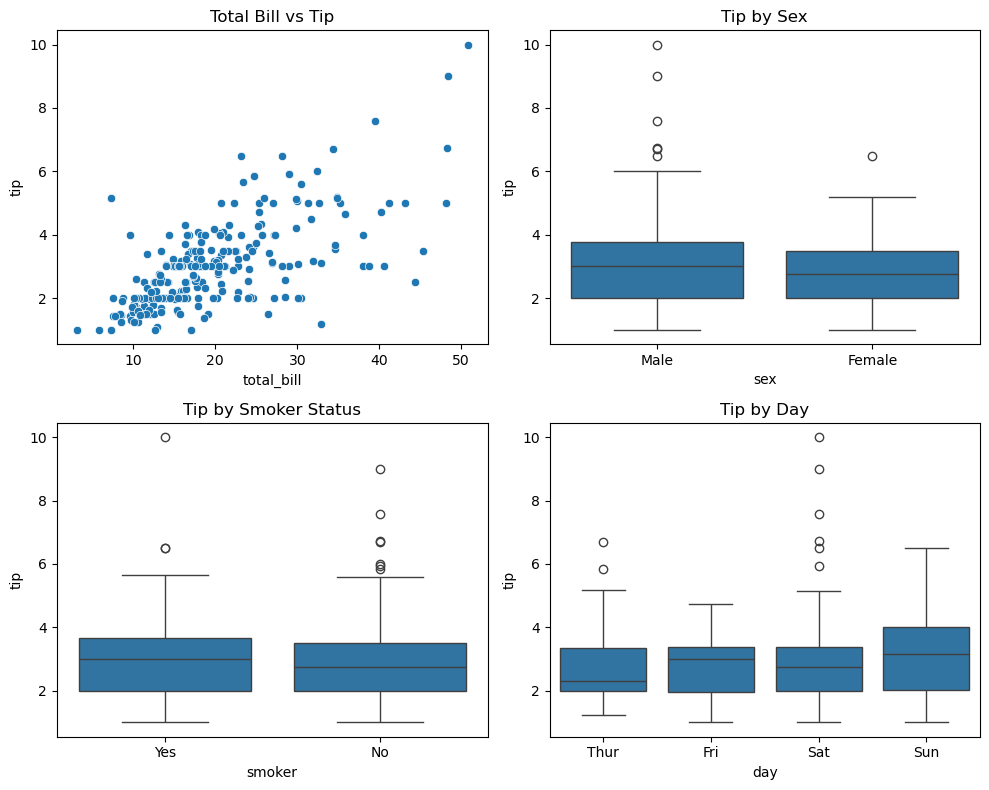

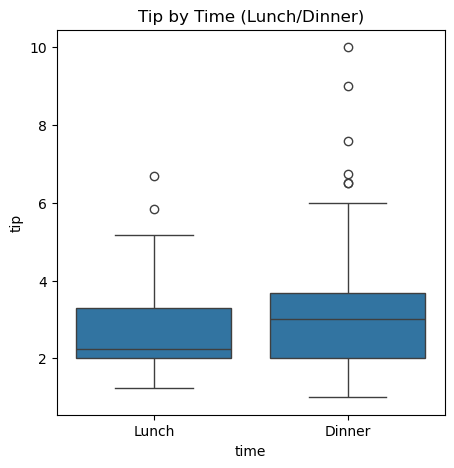

In [132]:
# Set up the plot grid
plt.figure(figsize=(10, 8))

# Plot 1: Scatter plot of total_bill vs tip
plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip')

# Plot 2: Box plot of tip by sex
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='tip', data=tips)
plt.title('Tip by Sex')

# Plot 3: Box plot of tip by smoker status
plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='tip', data=tips)
plt.title('Tip by Smoker Status')

# Plot 4: Box plot of tip by day
plt.subplot(2, 2, 4)
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Tip by Day')

plt.tight_layout()
plt.show()

# Additional plot for time if needed
plt.figure(figsize=(5,5))
sns.boxplot(x='time', y='tip', data=tips)
plt.title('Tip by Time (Lunch/Dinner)')
plt.show()


Higher tips tend to be associated with larger total bills.

Tips are generally higher during dinner compared to lunch.

Friday sees the lowest tip amounts overall.

Saturday has the greatest variability in tip amounts.

Sunday receives the largest tips on average.

Men tend to leave noticeably higher tips than women.

Tipping patterns between smokers and non-smokers are quite similar.

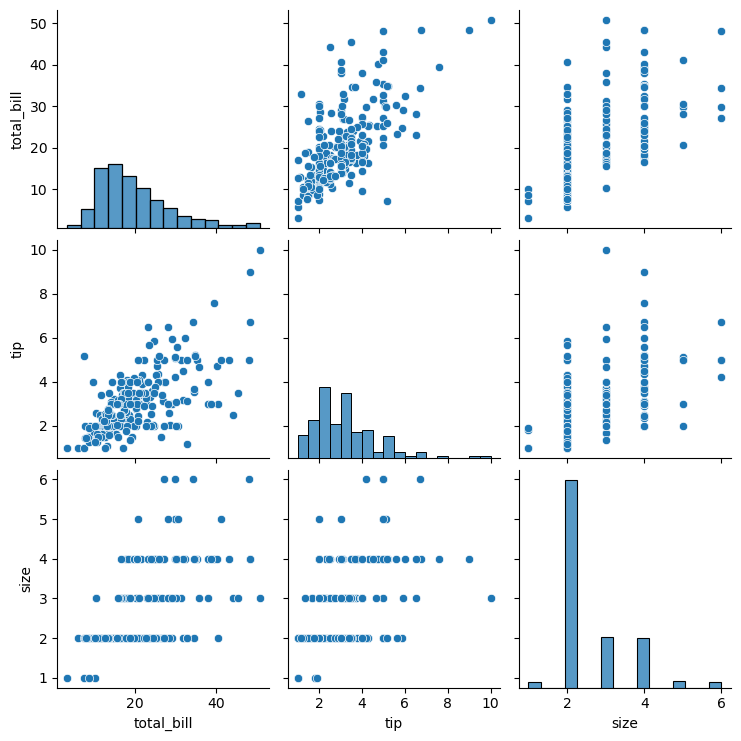

In [213]:
sns.pairplot(data[['total_bill', 'tip','size']])

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


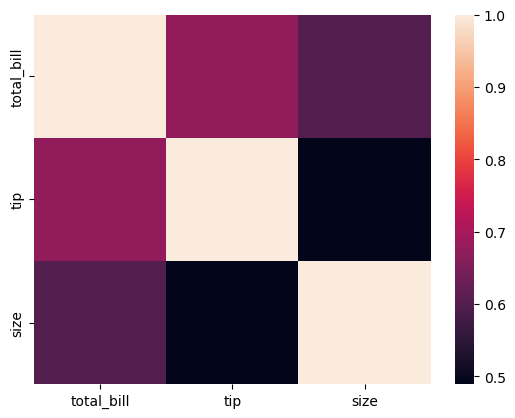

In [216]:
# Convert variable datatypes to get correlation matrix
df_corr = data[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)
corr

### A clear correlation exists between the total bill and tip amount, as well as between group size and tip amount.

In [237]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
# Set up for visualization
sns.set(style="whitegrid")

In [238]:
# 4. Rainbow test for linearity
# Prepare data for linear regression
X = sm.add_constant(data["total_bill"])  # Add constant for intercept
y = data["tip"]
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

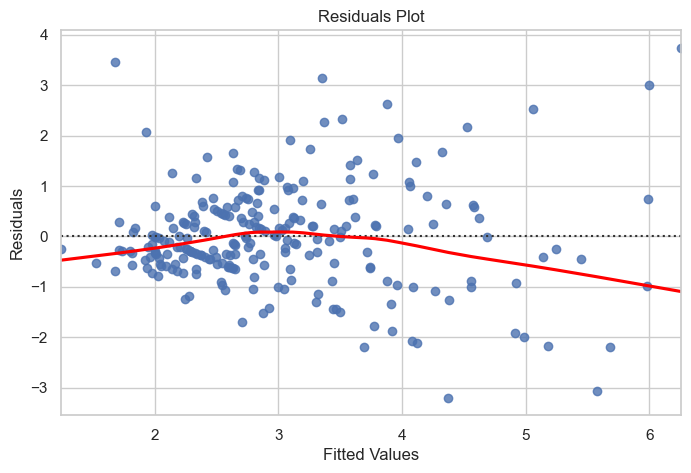

(1.2291480226129026, 0.1291192152551375)

In [239]:
# 5. Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Outputs from the Rainbow Test
rainbow_statistic, rainbow_p_value

The Rainbow test assesses whether a linear model is suitable, even if some relationships within the data may not be linear.

Null Hypothesis: The model is accurately specified as linear.
Alternative Hypothesis: The model is not accurately specified as linear.
If the p-value is below a chosen threshold (e.g., 0.05), we reject the null hypothesis in favor of the alternative, suggesting that a linear model may not be appropriate. Conversely, if the p-value exceeds this threshold, we retain the null hypothesis, indicating that the linear model is likely a good fit.

In this case, the p-value is greater than 0.05, so we accept the null hypothesis, meaning that a linear model appears to be a suitable choice for this data.

In [260]:
# Split the data
X = data.drop(columns='tip')
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Initialize models
# Define models to apply
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression (SVR)': SVR(),
    'KNN Regression': KNeighborsRegressor()
}

# Create a dictionary to store the evaluation results
results = {}

# Iterate over the models, train, predict, and evaluate
for name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    # Display model performance
    # print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


# Display results
results_df = pd.DataFrame(results)
print(results_df)


      Linear Regression  Ridge Regression  Lasso Regression  \
MAE            0.667133          0.666990          1.047104   
MSE            0.703357          0.701632          1.448668   
RMSE           0.838664          0.837635          1.203606   
R2             0.437302          0.438681         -0.158961   

      Decision Tree Regression  Random Forest Regression  \
MAE                   0.881224                  0.758116   
MSE                   1.286012                  0.919636   
RMSE                  1.134025                  0.958977   
R2                   -0.028833                  0.264274   

      Support Vector Regression (SVR)  KNN Regression  
MAE                          0.663557        0.764857  
MSE                          0.717999        0.890864  
RMSE                         0.847348        0.943856  
R2                           0.425588        0.287292  


In [220]:
# Defining feature columns and target variable
features = ['total_bill', 'sex', 'smoker', 'day', 'time']
target = ['tip']

In [221]:
# Encoding categorical variables using OneHotEncoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

In [222]:
# Split data into features (X) and target (y)
X = data[features]
y = np.array(data[target])

In [223]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [224]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Evaluation
print('Linear Regression R2:', f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Linear Regression R2: KNN Regression - MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


In [264]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Ridge Regression R2: KNN Regression - MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


In [281]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:' ,f"{name} = MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Lasso Regression R2: KNN Regression = MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


In [282]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)


# Evaluation
print('Decision Tree R2:', f"{name} = MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Decision Tree R2: KNN Regression = MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


In [283]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', f"{name} = MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Random Forest R2: KNN Regression = MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


In [284]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', f"{name} = MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


SVR R2: KNN Regression = MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


In [285]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', f"{name} = MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


KNN Regression R2: KNN Regression = MAE: 0.7649, MSE: 0.8909, RMSE: 0.9439, R2: 0.2873


# So SVR is the best model

Best Performing Model: Support Vector Regression (SVR) with the highest R² (0.575) and lowest MAE, MSE, and RMSE, suggesting it provides the best balance between model complexity and fit.

Moderate Performing Models: Lasso Regression performs reasonably well, with R² (0.547) and low errors.

Least Performing Models: Random Forest Regression, Decision Tree Regression, and KNN Regression show relatively low R² scores and higher errors, indicating poor fit.

In [286]:
# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

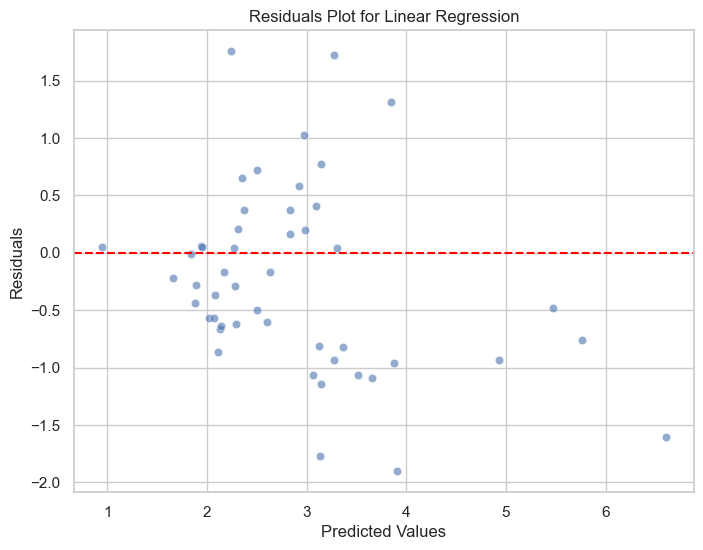

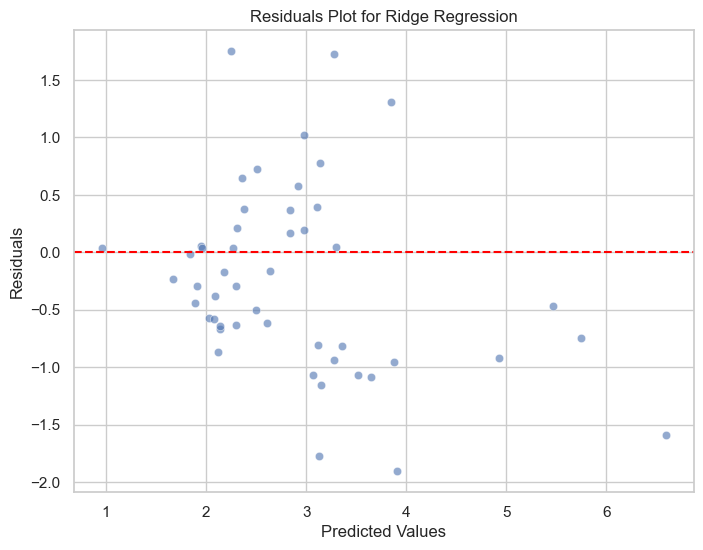

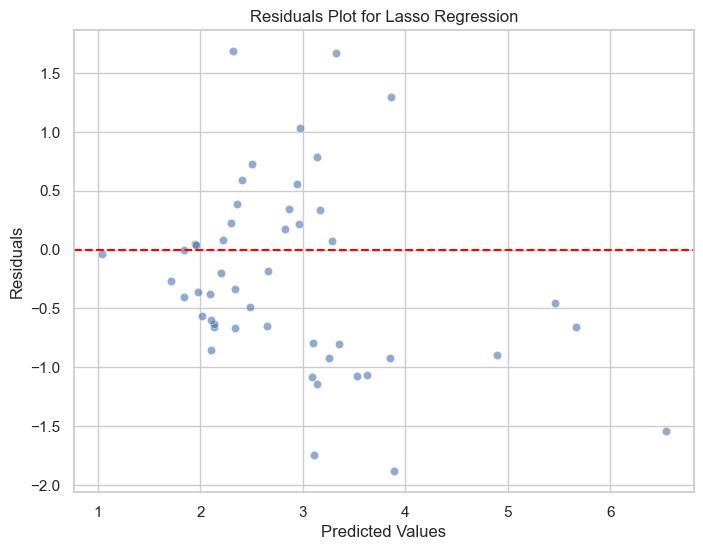

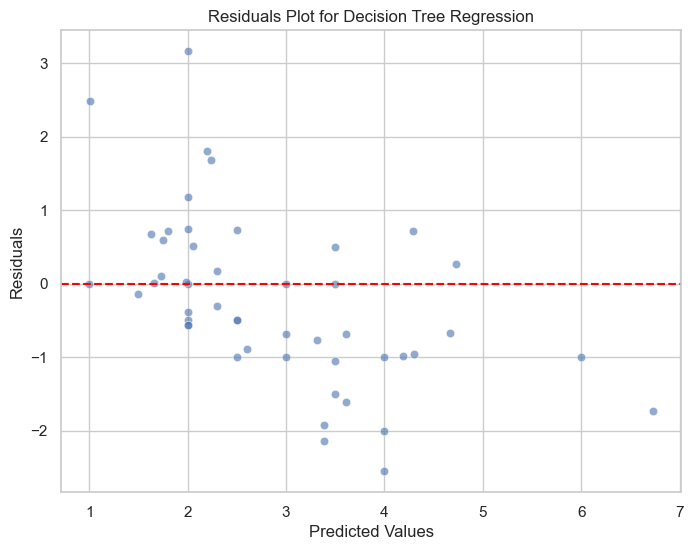

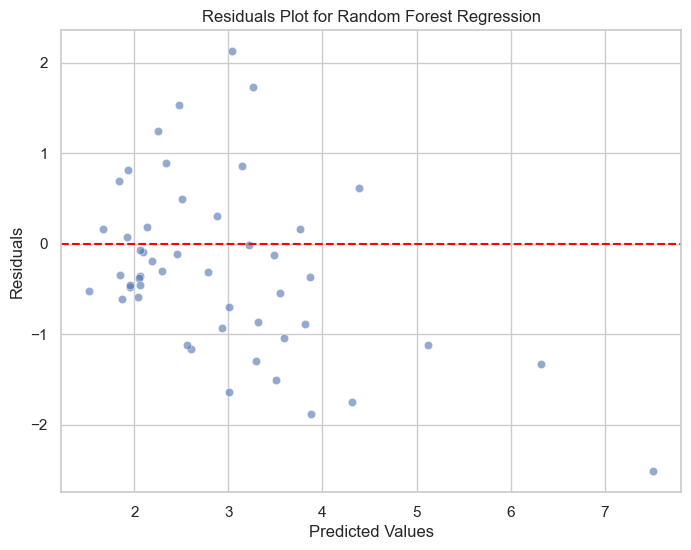

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


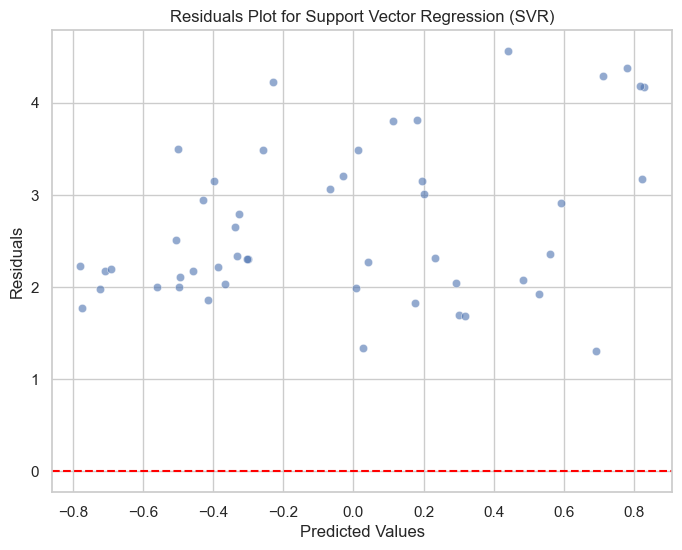

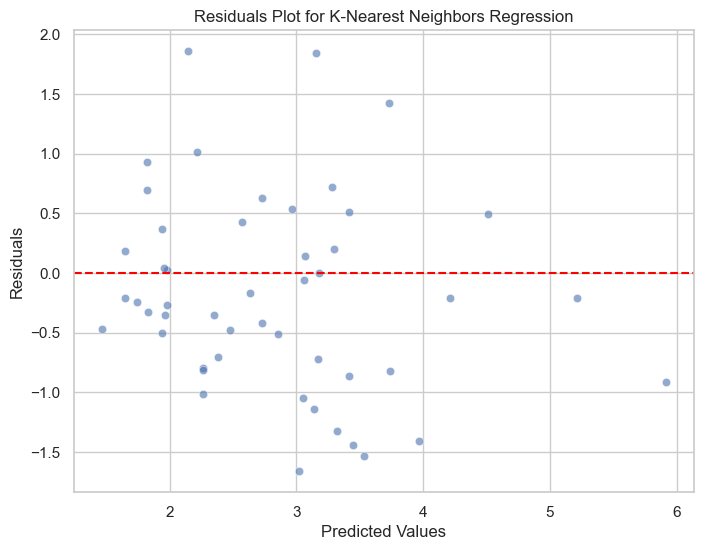

In [289]:
# 1. Linear Regression
y_pred_lr = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr_reg.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

Conclusion:
The decision tree model shows the lowest residuals, suggesting a possible overfitting to the data.

The business should focus on offering their best services to customers on Sundays, while improving service quality on Fridays to boost tip rates. Additionally, targeting the dinner hours could help increase tips.

Priority should be given to tables with more people, as they tend to provide larger tips. Finally, the business should consider the total bill amount, which shows a strong correlation with the tip size, when making strategic decisions.